# Assignment 1 - Linear Algebra


In this exercise, you will investigate various aspects of linear algebra.

* Use appropriate functions
* Comment your code.
* Use numpy/scipy libraries where appropriate, except where explicitly stated.

For each question where you are asked to write some code, you will also be asked to _briefly_ describe what you have done in a text cell below.  


## Q1

In this part you will need to use the matrix inversion code based on Cramer's rule, posted in the matrix-inversion notebook on Blackboard. Cut and paste the necessary functions into the cell below.

In [ ]:
import numpy as np
import scipy.linalg
import math

def det2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2:
        raise Exception("Non2x2Matrix")
    
    return ( m[0][0]*m[1][1] ) - ( m[0][1]*m[1][0] )

def inverse2x2(m):
    if m.shape[0] != 2 or m.shape[1] != 2: # seemed to be a typo here 
        raise Exception("Non2x2Matrix")

    det = det2x2(m)
    tmp = np.empty([2,2])
    tmp[0][0] = m[1][1] / det
    tmp[0][1] = -1 * m[0][1] / det
    tmp[1][0] = -1 * m[1][0] / det
    tmp[1][1] = m[0][0] / det
    return tmp
# this submatrix definition makes
def submatrix(m,i,j):                                
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    # create a new matrix
    n = m.shape[0]-1
    tmp = np.empty([n,n])
    
    # get the indices of the matrix that will be used
    tmpi = list(range(m.shape[0]))
    del tmpi[i]
    tmpj = list(range(m.shape[1]))
    del tmpj[j]
    
    for ii in range(n):
        for jj in range(n):
            tmp[ii][jj] = m[tmpi[ii]][tmpj[jj]]

    return tmp


def det(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if (m.shape[0]==2):
        return det2x2(m)
        
    else:
        tmp = 0
        # use 0-th row to calculate determinant
        for j in range(m.shape[0]):
            tmp = tmp + (math.pow(-1,j) * m[0][j] * det(submatrix(m,0,j)))
    
    return tmp

def adjugate(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    tmp = np.empty(m.shape)
    
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            # note the order of indices below !
            tmp[j][i] = (math.pow(-1,i+j) * det(submatrix(m,i,j)))
    return tmp


def inverse(m):
    if not (m.shape[0] == m.shape[1]):
        raise Exception("NonSquareMatrix")
    
    if m.shape[0]==2:
        return inverse2x2(m)
    
    d = det(m)        
    c = adjugate(m)
    return np.true_divide(c,d)



## 1a)
Verify that the code produces the correct result for a single _randomly_ generated 4x4 matrix. Make sure you account for possible rounding error due to limited floating point precision. 

In [ ]:
import numpy as np
def RADmat(N):
    random_matrix = np.random.rand(N,N)
    random_matrix2 = np.random.randint(-100,100,[N,N])
    rad = np.multiply(random_matrix, random_matrix2) # multiplies the two matrices
    return rad
I = RADmat(4)
inv = inverse(I)

print('Randomly generated matrix:\n',I)
print('Inversion of the above matirx using Cramers rule:\n', inv)
print('numpy function intersion:\n',scipy.linalg.inv(I))


## 1b)
Plot the cpu-time taken to solve a randomly generated simultaneous equation as a function of the matrix order N. Your plot should contain 3 lines, for each of the following methods :
1. the matrix inversion function above based on Cramer's rule
2. LU decomposition using scipy
3. SVD decomposition using scipy

Note that you will need to generate both a random NxN matrix, and a random set of solutions. You will need to think about how you're going to handle errors (eg. if you generate a random matrix that is singular). You will need to look up the LU and SVD decomposition routines in the scipy reference manual (https://docs.scipy.org/doc/scipy/reference/), and make sure that your treatment of each routine is "fair", i.e. performs the same calculation.

You may want to read up on these methods in Numerical Recipes. The 3rd edition is available free online at http://numerical.recipes/oldverswitcher.html. LU decomposition is on p48 and SVD decomposition is on p65 in this edition.

Finally, write a paragraph describing your code in the text cell below : how you designed the code, what choices you had to make, and why - in particular how you deal with the issues raised above.

In [ ]:
##currently only 1st aprt done, need to learn the other methods.
# to generate a figure for matrix inversion based n Cramer's Rule:
import time
import matplotlib.pylab as plt

def RADSOLs(N): #generates random set of solutions.
    random_solsdec = np.random.rand(N,1)
    random_solsint = np.random.randint(-100,100,[N,1])
    random_sols = np.multiply(random_solsint,random_solsdec)
    return random_sols

def Matrix_time_cramers(N): #calculates it for the Cramer's rule method
    n=1
    t = [0]
    Nx = [0]
    while n <= N:   
        n=n+1
        tic = time.perf_counter()
        inv = inverse(RADmat(n))
        solution = np.matmul(inv,RADSOLs(n))#solves the simultanoeous equations
        toc = time.perf_counter()
        t.append((toc-tic))
        Nx.append(n)
    return t, Nx   

def Matrix_time_LU(N): #calculates solutions using LU decomposition
    n=1
    t = [0]
    Nx = [0]
    while n <= N:   
        n=n+1
        tic = time.perf_counter()
        lu = scipy.linalg.lu_factor(RADmat(n))
        x = scipy.linalg.lu_solve(lu,RADSOLs(n))
        toc = time.perf_counter()
        t.append((toc-tic))
        Nx.append(n)
    return t, Nx 

def Matrix_time_SVD(N): #calculates solutions using SVD decomposition
    n=1
    t = [0]
    Nx = [0]
    while n <= N:   
        n=n+1
        tic = time.perf_counter()
        U,s,V = scipy.linalg.svd(RADmat(n))
        svd = np.dot(np.dot(np.dot(V.T,scipy.linalg.inv(np.diag(s))),U.T),RADSOLs(n))
        toc = time.perf_counter()
        t.append((toc-tic))
        Nx.append(n)
    return t, Nx 

Max = Matrix_time_cramers(6) 
MATLU = Matrix_time_LU(6)
MATSVD = Matrix_time_SVD(6)

plt.plot(Max[0],Max[1],label = 'Cramers rule')
plt.plot(MATLU[0],MATLU[1], label = 'LU decomposition')
plt.plot(MATSVD[0],MATSVD[1], label = 'SVD decomposition')
plt.title('CPU TIME for different size random matrices')
plt.xlabel('CPU TIME (s)')
plt.ylabel('Number of square matrix columns')
plt.legend()
plt.show()

MATLU2 = Matrix_time_LU(100)
MATSVD2 = Matrix_time_SVD(100)

plt.plot(MATLU2[0],MATLU2[1], label = 'LU decomposition')
plt.plot(MATSVD2[0],MATSVD2[1], label = 'SVD decomposition')
plt.xlabel('CPU TIME (s)')
plt.ylabel('Number of square matrix columns')
plt.legend()
plt.show()





Ive made the code so that the time interval is taken only across the calculation. I used time.pref_counter() to do this. I made sure that the random solutions and matrixes are calculated in the calculation zone of the code. However, note that the methods calculate a different matrix each, but this shouldnt have a big effect on the speed of the calculation.


## 1c)
Now discuss the results you obtained above. Can you explain the results in terms of the number of operations performed by each function ?  You might want to look up the **computational complexity** of these algorithms.  How well do the curves conform to your explanation ?

## Discussion
It can be seen form the plots above that Cramer’s rule is the most inefficient method for
computing the solution of simultaneous equations, when compared to LU and SVD 
decomposition. This inefficiency comes from the number of steps necessary in these methods to find the solution. 

For Cramer’s we see that we have several steps to complete in order to solve the equation, if your solving a nxn matrix then you will need to find n! products and because the determinate of n matrices needs to be calculated, it becomes n!n calculations. This is a complexity $O(n!n)$. This means that it can very easily become a very large number of calculations, which leads to higher computational power to compute. LU $(O(\frac{2}{3}n^{3}))$ and SVD $(O(n^3))$ have lower computational complexity, where LU decomposition is the least complex. This is what is seen in the second figure from above. Comparing LU and SVD decomposition shows that SVD has longer CPU times for larger N matrices. Either of these two decompositions is a more efficient method to Cramer’s, with LU decomposition being the most efficient method. 
On the second graph there are noticeable spikes of longer computational time, which change when recomputing. These are likely to be anomalies from the random matrices. As a new matrix is computed for each solution method, the same spikes are not seen.


## 1d)
Next, we will study the precision of the algorithms - in particular, for near singular matrices. Write a routine that will estimate (and plot) the precision of the result when solving the equation below, for small values of k. Your function should do this for all 3 routines studied in Q1b).

\begin{eqnarray*}
x + y + z & = & 5 \\
x + 2y - z & = & 10 \\
2x + 3y +kz & = & 15 
\end{eqnarray*}

You will need to choose a method to estimate the precision, given that the equation solvers will return values for all of x, y, and z.

As before, describe the functionality of the code and the choices you made writing it in the text cell below.

In [ ]:

def func():
    k = [0]
    x_lu =[0]
    x_svd = [0]
    x_cra = [0]
    for i in np.arange(0.00001,0.002,0.00001):
        A = np.array([[1,1,1],[1,2,-1],[2,3,i]])
        b = np.array([[5],[10],[15]])
        lu = scipy.linalg.lu_factor(A)
        x = scipy.linalg.lu_solve(lu,b)
        U,s,V = scipy.linalg.svd(A)
        svd = np.dot(np.dot(np.dot(V.T,scipy.linalg.inv(np.diag(s))),U.T),b)
        sol = np.array([[0],[5],[0]])
        inv = inverse(A)
        solution = np.matmul(inv,b)
        
        x_lu.append(x[0] - sol[0])
        x_svd.append(svd[0] - sol[0])
        x_cra.append(solution[0] - sol[0])
        k.append(i)
    return k, x_lu,x_svd,x_cra

fe = func()

plt.plot(fe[0],fe[2],label='SVD')
plt.plot(fe[0],fe[1],label='LU')
plt.plot(fe[0],fe[3],label='Cramers')
plt.xlabel('k')
plt.ylabel('Precision')
plt.legend()
plt.show()


My code calculates the value of the solution with each method with different values of k. I subtract the calculated value from the known solution to give its precision. 

## 1e)
Discuss your results in the test box below. You should describe the behaviour of each algorithm as k goes to 0, and explain what is happening in each case. How would these results affect your choice of algorithm ?

## Discussion

To calculate the precision I looked at how the value of k changed the known solution of the matrix. I used my x value for this but it can be used for any of the values.
It can be seen from the figure above the cramers rule becomes less precise as k becomes very small. This is also seen in SVD decomposition. The reason for this is down to float precision error which is created when preforming calculations.  
Lu decomposition as seen on the figure above does not seem to vary as k becomes small, this shows that for small numbers this is the prefered method for highest precision, it doesnt suffer from the same problem as the others because it is a simpler process (lower complexity). This means that it would mean that the prefered algorithum would be LU demcomposition.



## Q2
This question is on eigenvalue problems.  

## 2a)
In this part you should write a function that will find the eigenvector/eigenvalues of a matrix A using "Rayleigh quotient iteration". The algorithm is as follows :

1. An initial values for the eigenvalue $\mu_0$ and eigenvector $b_0$ must be supplied

2. The next approximation of the eigenvector is given by :
$$b_{i+1} = \frac{(A-\mu_i I)^{-1}b_i}{|(A-\mu_i I)^{-1}b_i|}$$

3. The corresponding eigenvalue is given by :

$$\mu_{i+1} = \frac{b^*_{i+1}Ab_{i+1}}{b^*_{i+1}b_{i+1}}$$

4. Now iterate steps 2 and 3 until convergence is reached for a specified precision, ie.
$$\mu_{i+1} - \mu < a_{tol}$$

(Note that the numerator in 2. can also be found by solving $(A-\mu_i I)x = b$) 

Your function should take arguments for the matrix A, the initial estimates of eigenvalue and eigenvector, and the precision required (ie. a convergence condition).

You should use vector and matrix algebra routines from numpy and scipy.linalg for the operations described above.

Explain the choices you made when writing this code in the text cell below.

In [ ]:
from scipy import linalg as LA
import numpy as np

def it(A,b,u,Atol):
    I = np.identity(3)
    tol = 1
    n = 0
    while tol != Atol:
        btop = np.dot(  LA.inv(A-u*I) , b  )
        bbtom = np.linalg.norm(btop)
        b1 = btop/bbtom  
        utop = np.dot(np.conj(b1).T, np.dot(A,b1))
        ubtom = np.dot(np.conj(b1).T,b1)
        u1 = utop/ubtom
        tol = u - u1    
        n = n+1   
        u = u1
        b = b1
    return u1,b1,n
        
A = RADmat(3)
b = np.array([[1],[1],[1]])
u = -0.5
x = it(A,b,u,0)
print('eigenvalue', x[0])
print('eigenvector\n',x[1])
print('Number of iterations: ',x[2])

print('-----------------------------')
print('Finding eigenvalues using scipy')
e_vals,e_vecs = LA.eig(A)
print ("Eigenvalues")
print(e_vals)
print ("Eigenvectors")
print(e_vecs)




This code produces a eigenvalue and corresponding eigenvector for a random matrix with values between -100,100. I have used the functions np.dot to multiply and used the scipy's linalg function to inverse any matrixes. Not i have then use the linalg.eig to find the eigen values and print them to beable to compare them outputs.
We can see that the eigenvalues found corresponds to the second one found in the scipy.linalg function. And also the eigenvector correspons to the one in the in the second column.

### 2b)
Now test your function using a matrix with known eigenvalues / vectors. You can use :
$$\left(\begin{array}{ccc} 1 & 2 & 3 \\ 1 & 2 & 1 \\ 3 & 2 & 1 \end{array}\right)$$

The leading eigenvalue of this matrix is $\sqrt{5}+3$, which corresponds to the eigenvector :
$$\left(\begin{array}{c} 1 \\ \frac{\sqrt(5)}{2} \\ 1 \end{array}\right)$$

In [ ]:
A = np.array([[1,2,3],[1,2,1],[3,2,1]])
b = np.array([[-2],[0],[-2]])
u = 3
x = it(A,b,u,0)
print('eigenvalue', x[0])
print('eigenvector\n',x[1])
print('Number of iterations: ',x[2])
e_vals,e_vecs = LA.eig(A)
print ("Eigenvalues")
print(e_vals)
print ("Eigenvectors")
print(e_vecs)




## 2c)
Your function should find the largest eigenvalue of a matrix, along with it's corresponding eigenvector. Given that eigenvectors of a real symmetric matrix are orthogonal, can you think of a method to find the 2nd eigenvector of the above matrix ? How could you extend this to non-symmetric matrices ? Discuss in the text box below, and use the code cell below that if you want to write any code to demonstrate your answer. 

The other eigenvalues and eigenvectors can be found from choosing different intial eigenvalue and eigenvector, this is done below for the eigen value 0.7639. The same can be done for the other eigen value, -2. However the inital values and vector is harder to find.

In [ ]:
A = np.array([[1,2,3],[1,2,1],[3,2,1]])
b = np.array([[0],[1],[0]])
u = 3
print("To find e_Vec for a different e_Value calculation used: \n u =", u)
print("And inital vector: \n",b)

x = it(A,b,u,0)
print('eigenvalue', x[0])
print('eigenvector\n',x[1])
print('Number of iterations: ',x[2])





## Q3

For this question you should write a function that will find the eigenvalues of the coupled system of oscillators shown below.

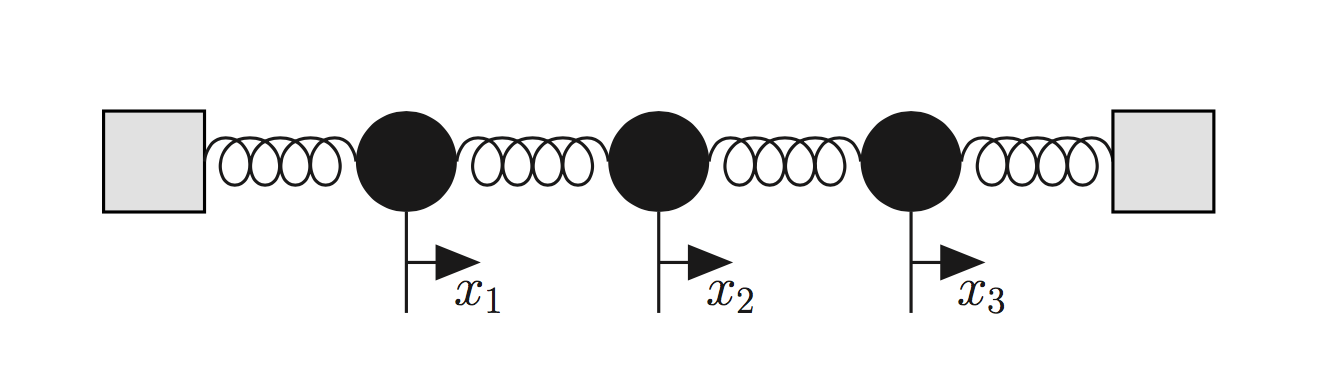

If the displacement of the $i$th mass from its equilibrium position is denoted as $x_i$, the force on the mass is given by the tension in the two springs as :

$$F_i = −k(x_i − x_i−1) + k(x_i+1 − x_i) = −k(2x_i − x_i−1 − x_i+1)$$

We can assume that there are normal mode solutions, i.e. solutions of the form $x_i = z_i e^{i\omega t}$ in which all masses oscillate with the same frequency $\omega$ but with unknown phasors $z_i$. Then the above equation becomes :

$$F_i = m\ddot{x}_i = −m\omega^2x_i = −k(2x_i − x_i−1 − x_i+1)$$

This is one row of a matrix equation describing the entire system :

$$m\omega^2x_i \left(\begin{array}{c} \vdots \\ \\ x_i \\ \\ \vdots \end{array}\right) = 
\left(\begin{array}{ccccccc} & & & \vdots & & & \\ \cdots & 0 & -1 & 2 & 1 & 0 & \cdots \\ & & & \vdots & & & \end{array}\right)
\left(\begin{array}{c} \vdots \\ x_{i-1} \\ x_i \\ x_{i+1} \\ \vdots \end{array}\right)
$$

This example is a typical eigenvalue problem, in that many of the matrix elements are zero, which can greatly simplify the computational challenge and make even large systems solvable.

## 3a)
Write a function in the cell below that will calculate the normal modes and corresponding oscillation frequencies for a system of three identical masses connected by identical springs as shown above.

As for previous questions, briefly describe how your code works and the choices you made when writing it in the text cell below.

In [ ]:
from scipy import linalg
import matplotlib.pylab as plt
from IPython.display import HTML

from matplotlib import animation, rc
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]]) #I believe the matirx above is wrong and this is the correct version.
t= np.linspace(0,20,200)
dt = 20/200

def e(lamda,t):
    return np.exp(1.j*np.sqrt(lamda)*t)


def MODE(t, option, e_vals,e_vecs):
    lamda1 = e_vals[0].real
    lamda2 = e_vals[1].real
    lamda3 = e_vals[2].real
    if option == 'MODE1':
        MODE_x2 = e_vecs[1,0]*e(lamda1,t)
        MODE_x1 = e_vecs[0,0]*e(lamda1,t)  - MODE_x2[0]  - 0.5  #sets inital conditions
        MODE_x3 = e_vecs[2,0]*e(lamda1,t)  + MODE_x2[0] +0.5
    if option == 'MODE2':
        MODE_x2 = e_vecs[1,1]*e(lamda2,t)
        MODE_x1 = e_vecs[0,1]*e(lamda2,t) - MODE_x2[0] -0.7
        MODE_x3 = e_vecs[2,1]*e(lamda2,t) + MODE_x2[0] + 0.7
    if option == 'MODE3':
        MODE_x2 = e_vecs[1,2]*e(lamda3,t)
        MODE_x1 = e_vecs[0,2]*e(lamda3,t)- MODE_x2[0]
        MODE_x3 = e_vecs[2,2]*e(lamda3,t) + MODE_x2[0] 
    if not ('MODE1' or 'MODE2' or 'MODE3'):
        raise Exception("INVALID INPUT")
    return MODE_x1, MODE_x2,MODE_x3


e_vals,e_vecs = linalg.eig(A)    
one = np.array([['x1'],['x2'],['x3']])
print('Normal modes and frequencies are: \n')
print('MODE 1: \n',one,' = ',e_vecs[:,0],'e^{iwt}','  Ocillation Frequency (w) =',round(e_vals[0].real,4))
print('MODE 2: \n',one,' = ',e_vecs[:,1],'e^{iwt}','  Ocillation Frequency (w) =',round(e_vals[1].real,4))
print('MODE 3: \n',one,' = ',e_vecs[:,2],'e^{iwt}','  Ocillation Frequency (w) =',round(e_vals[2].real,4))


y = MODE(t,'MODE1', e_vals, e_vecs)

plt.plot(t,y[0],linestyle='dashed',label='Mass 1')
plt.plot(t,y[1],label='Mass 2')
plt.plot(t,y[2],label='Mass 3')
plt.title('Mode 1')
plt.xlabel('Time (s)')
plt.ylabel('X displacement')
plt.legend()
plt.show()

y = MODE(t,'MODE2', e_vals, e_vecs)

plt.plot(t,y[0],linestyle='dashed',label='Mass 1')
plt.plot(t,y[1],label='Mass 2')
plt.plot(t,y[2],label='Mass 3')
plt.title('Mode 2')
plt.xlabel('Time (s)')
plt.ylabel('X displacement')
plt.legend()
plt.show()

y = MODE(t,'MODE3', e_vals, e_vecs)

plt.plot(t,y[0],linestyle='dashed',label='Mass 1')
plt.plot(t,y[1],label='Mass 2')
plt.plot(t,y[2],label='Mass 3')
plt.title('Mode 3')
plt.xlabel('Time (s)')
plt.ylabel('X displacement')
plt.legend()
plt.show()



This code produces the eigenvalues and eigenvectors of the matrix equation above using scipy.linalg function (note that this equation is wrong as the $x_{i}$ is not supposed to be there) . It then  organises them to show and display the 3-normal modes and ocisllation frequencies. It then uses these to show how the modes change as a function of time. Note that these starting positions are not precisely accurate, but the general mode can be seen form the figures, above.

## 3b)
Discuss your results above. Describe the physical interpretation of each mode you have found ? How does the behaviour change if the springs at either end are removed ?

### Answer:
Each mode has a different physicsal interpretation, the figures above show this well but it can be better visualised with a small animation of the systems. The code below creates this animation for each mode, it also shows the position of the walls, which are just placed far enough away so it does not interfer with the animation.




In [ ]:
#Not that this can take afew seconds to load.
from IPython.display import HTML

dt = 20/200
t= np.linspace(0,20,200)

M = MODE(t,'MODE1',e_vals,e_vecs) #Change Mode Number here to see video of different Normal Modes.
Mx1 = M[0]
Mx2 =M[1]
Mx3=M[2]

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-1, 1))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=1,ls='--',)

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [Mx1[i], Mx2[i], Mx3[i],-2,2] #change the mode number above to see different modes
    thisy = [0, 0, 0,0,0]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = animation.FuncAnimation(fig, animate,
                              interval=dt*1000, blit=True, init_func=init)

HTML(ani.to_jshtml()) # creates a video to view the physical interpretation of the modes.

### WIthout springs at either end

When the springs at each end are removed the Matrix Equation becomes:

\begin{equation}
\left [ \begin{array}{c} \ddot x_1 \\ \ddot x_2 \\ \ddot x_3  \end{array} \right ] =\frac{k}{m} \left [ \begin{array}{ccc} 
  1 & -1 & 0\\ 
 -1  & 2 & -1\\
  0 & -1 & 1\\
\end{array} \right ]
\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \end{array} \right ]
\end{equation} 

This can be solved just like the other matrix equaiton to give new normal modes and oscillation frequencies. Looking below, you can see that the difference are that the 3rd mode has now gone and the remaining 2 are similar to mode 1 and 2 when there are springs at either end, but these modes have different oscillation frequencies.


In [ ]:
A = np.array([[1,-1,0],[-1,2,-1],[0,-1,1]])
t= np.linspace(0,20,200)
dt = 20/200
e_vals,e_vecs = linalg.eig(A)

one = np.array([['x1'],['x2'],['x3']])
print('Normal modes and frequencies are: \n')
print('MODE 1: \n',one,' = ',e_vecs[:,0],'e^{iwt}','  Ocillation Frequency (w) =',round(e_vals[0].real,2))
print('MODE 2: \n',one,' = ',e_vecs[:,1],'e^{iwt}','  Ocillation Frequency (w) =',round(e_vals[1].real,2))
print('MODE 3: \n',one,' = ',e_vecs[:,2],'e^{iwt}','  Ocillation Frequency (w) =',round(e_vals[2].real,2))
print('*Note that there is no Mode 3 because w = 0*')


y = MODE(t,'MODE1', e_vals, e_vecs)

plt.plot(t,y[0],linestyle='dashed',label='Mass 1')
plt.plot(t,y[1],label='Mass 2')
plt.plot(t,y[2],label='Mass 3')
plt.title('Mode 1')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

y = MODE(t,'MODE2', e_vals, e_vecs)

plt.plot(t,y[0],linestyle='dashed',label='Mass 1')
plt.plot(t,y[1],label='Mass 2')
plt.plot(t,y[2],label='Mass 3')
plt.title('Mode 2')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

